# Домашнее задание 1. Сбор данных

При решении реальных задач мы почти никогда не имеем дело с "хорошими" исходными данными, уже подготовленными для обработки и анализа. Как правило на входе имеются неструкткрированные данные в "грязном" виде, например необработанные тексты, изображения или аудио файлы. Иногда нет даже этого, и данные приходится собирать из разных доступных источников: разнообразных баз данных, внешних сервисов и даже электронных таблиц. После того, как данные получены, их унифицируют, очищают от шума, преобразовывают в нужный вид и сохраняют для дальнейшего анализа. В одном из традиционных подходов к Data Mining этот процесс называется Extract-Transform-Load

In [1]:
!pip install -r requirements.txt

Could not open requirements file: [Errno 2] Нет такого файла или каталога: 'requirements.txt'


In [2]:
import vk
import folium
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
from folium.plugins import MarkerCluster

ImportError: No module named vk

Нам потребуется загрузить информацию о местах, в которых совершаются чекины, иначе говоря провести сбор данных (data collection). [Ссылка на ВК для разработчиков](https://vk.com/dev)

Для того, чтобы получить доступ к API прежде всего необходимо зарегистрироваться в VK в качестве разработчика и создать свое [приложение](https://vk.com/apps?act=manage). После создания приложения будет доступен набор ключей, которые мы будем использовать для аутентификации. Далее вам потребуется создать токен авторизации, чтобы получать доступ к API. Этот токен необходимо скопировать в соответствующие константы ниже. Подробнее о том, как работает аутентификация в VK API можно почитать [по ссылке](https://vk.com/dev/first_guide), хотя это нужно скорее для ознакомления: библиотека обращения с API позаботится о механизме аутентификации за нас.

In [2]:
ACCESS_TOKEN = "87640da2d2e16d1284885cf8aa66ca0081080d7bd57e23c23c782b843e3987ef4a779e09d37a166942dae"
session = vk.Session(access_token=ACCESS_TOKEN)
vkapi = vk.API(session=session)

VK API может отдавать вам посещаемые места несколькими способами: в некотором радиусе от точки или же по id самого места. Мы будем пользоваться [вторым способом](https://vk.com/dev/places.getById) . Требуется написать функцию, которая на вход получает объект подключения к API и индекс, до какого объекта требуется запросить. Возвращать она будет pandas.DataFrame с полученными данными.

In [99]:
def get_place_info(vkapi, idx=5000, limit=9000):
    #делаем строку из id через запятую и разрезаем на куски приемлемой длины
    strings = []
    ids_string = ','.join(str(i) for i in range(1, idx+1))
    while (len(ids_string) > limit):    
        pos = ids_string[:limit].rfind(',')
        chunk, ids_string = ids_string[:pos], ids_string[pos+1:]
        strings.append(chunk)
    strings.append(ids_string)
    
    df = pd.DataFrame() 
    
    for chunk in strings:
        vk_places_data = vkapi.places.getById(places=chunk)
        df = df.append(pd.DataFrame(vk_places_data), ignore_index = True)
        
    return df

In [100]:
places_data = get_place_info(vkapi, 15000)

In [101]:
places_data

,address,checkins,city,country,created,icon,latitude,longitude,pid,title,type,updated
0,Мячковский б-р 3а,441,1.0,1,1280741941,https://vk.com/images/places/clubs.png,55.657941,37.751574,1,Baila Baila,4,1.507325e+09
1,Дачная 2а,16,123.0,1,1280741941,https://vk.com/images/places/clubs.png,53.202017,50.141377,2,Lust,4,1.507325e+09
2,Лени Голикова 29,7,2.0,1,1280741941,https://vk.com/images/places/clubs.png,59.843376,30.231480,3,Тайфун,4,1.486398e+09
3,Героев Танкограда 63,8,158.0,1,1280741941,https://vk.com/images/places/clubs.png,55.174954,61.451611,4,Hollywood,4,1.470157e+09
4,Мусы Джалиля 14К1,40,99.0,1,1280741941,https://vk.com/images/places/clubs.png,54.860834,83.091932,5,Барабас,4,1.502604e+09
5,Мусы Джалиля 14,6,99.0,1,1280741941,https://vk.com/images/places/clubs.png,54.861114,83.091415,6,Опера,4,1.471622e+09
6,Труда 153,15,158.0,1,1280741941,https://vk.com/images/places/clubs.png,55.166948,61.395017,7,Малахит,4,1.470755e+09
7,Сони Кривой 81,3,158.0,1,1280741941,https://vk.com/images/places/clubs.png,55.157006,61.365395,8,Полет,4,1.455943e+09
8,просп. Ленина 66а,198,158.0,1,1280741941,https://vk.com/images/places/clubs.png,55.160365,61.380302,9,Уральские пельмени,4,1.507461e+09
9,Гурьянова 31,14,1.0,1,1280741941,https://vk.com/images/places/clubs.png,55.684858,37.718300,10,Salvador Dali,4,1.498625e+09


In [102]:
places_data.to_csv('vk_places.csv', encoding = 'utf-8')

In [3]:
places_data = pd.read_csv('vk_places.csv', encoding = 'utf-8')
places_data

,Unnamed: 0,address,checkins,city,country,created,icon,latitude,longitude,pid,title,type,updated
0,0,Мячковский б-р 3а,441,1.0,1,1280741941,https://vk.com/images/places/clubs.png,55.657941,37.751574,1,Baila Baila,4,1.507325e+09
1,1,Дачная 2а,16,123.0,1,1280741941,https://vk.com/images/places/clubs.png,53.202017,50.141377,2,Lust,4,1.507325e+09
2,2,Лени Голикова 29,7,2.0,1,1280741941,https://vk.com/images/places/clubs.png,59.843376,30.231480,3,Тайфун,4,1.486398e+09
3,3,Героев Танкограда 63,8,158.0,1,1280741941,https://vk.com/images/places/clubs.png,55.174954,61.451611,4,Hollywood,4,1.470157e+09
4,4,Мусы Джалиля 14К1,40,99.0,1,1280741941,https://vk.com/images/places/clubs.png,54.860834,83.091932,5,Барабас,4,1.502604e+09
5,5,Мусы Джалиля 14,6,99.0,1,1280741941,https://vk.com/images/places/clubs.png,54.861114,83.091415,6,Опера,4,1.471622e+09
6,6,Труда 153,15,158.0,1,1280741941,https://vk.com/images/places/clubs.png,55.166948,61.395017,7,Малахит,4,1.470755e+09
7,7,Сони Кривой 81,3,158.0,1,1280741941,https://vk.com/images/places/clubs.png,55.157006,61.365395,8,Полет,4,1.455943e+09
8,8,просп. Ленина 66а,198,158.0,1,1280741941,https://vk.com/images/places/clubs.png,55.160365,61.380302,9,Уральские пельмени,4,1.507461e+09
9,9,Гурьянова 31,14,1.0,1,1280741941,https://vk.com/images/places/clubs.png,55.684858,37.718300,10,Salvador Dali,4,1.498625e+09


In [3]:
#узнаем типы мест, соответствующие кодам
types = vkapi.places.getTypes()
types = pd.DataFrame(types)
types.to_csv('types.csv', encoding = 'utf-8')

NameError: name 'vkapi' is not defined

In [4]:
types = pd.read_csv('types.csv', encoding = 'utf-8')
types

,Unnamed: 0,icon,tid,title
0,0,https://vk.com/images/places/home.png,1,Дом
1,1,https://vk.com/images/places/work.png,2,Работа
2,2,https://vk.com/images/places/restaraunt.png,3,Ресторан
3,3,https://vk.com/images/places/clubs.png,4,Клуб
4,4,https://vk.com/images/places/cinema.png,5,Кинотеатр
5,5,https://vk.com/images/places/bar.png,6,Бар
6,6,https://vk.com/images/places/entertainment.png,7,Развлечения
7,7,https://vk.com/images/places/shop.png,8,Магазин
8,8,https://vk.com/images/places/airport.png,9,Аэропорт
9,9,https://vk.com/images/places/train.png,10,Вокзал


In [5]:
dictionary = dict(zip(list(types['tid']), list(types['title'])))
dictionary

{1: u'\u0414\u043e\u043c',
 2: u'\u0420\u0430\u0431\u043e\u0442\u0430',
 3: u'\u0420\u0435\u0441\u0442\u043e\u0440\u0430\u043d',
 4: u'\u041a\u043b\u0443\u0431',
 5: u'\u041a\u0438\u043d\u043e\u0442\u0435\u0430\u0442\u0440',
 6: u'\u0411\u0430\u0440',
 7: u'\u0420\u0430\u0437\u0432\u043b\u0435\u0447\u0435\u043d\u0438\u044f',
 8: u'\u041c\u0430\u0433\u0430\u0437\u0438\u043d',
 9: u'\u0410\u044d\u0440\u043e\u043f\u043e\u0440\u0442',
 10: u'\u0412\u043e\u043a\u0437\u0430\u043b',
 11: u'\u041e\u0442\u0435\u043b\u044c',
 12: u'\u041a\u0430\u0444\u0435',
 13: u'\u0411\u0438\u0441\u0442\u0440\u043e',
 14: u'\u041f\u0438\u0446\u0446\u0435\u0440\u0438\u044f',
 15: u'\u0411\u0430\u0441\u0441\u0435\u0439\u043d',
 16: u'\u0422\u0440\u0435\u043d\u0430\u0436\u0435\u0440\u043d\u044b\u0439 \u0437\u0430\u043b',
 17: u'\u0423\u0447\u0435\u0431\u043d\u043e\u0435 \u0437\u0430\u0432\u0435\u0434\u0435\u043d\u0438\u0435',
 18: u'\u041c\u0443\u0437\u0435\u0439',
 19: u'\u0422\u0435\u0430\u0442\u0440',
 20: u'

In [6]:
#переводим в нашей выборке тип в текстовое описание
places_data_text = places_data
cleanup = {"type":     dictionary}
places_data_text = places_data_text.replace(cleanup, inplace=False)
places_data_text.to_csv('vk_places_text.csv', encoding = 'utf-8')

In [7]:
places_data_text = pd.read_csv('vk_places_text.csv', encoding = 'utf-8')

Предположим, что мы хотим понять несколько фактов о выборке объектов с id от 1 до 15000.
Помогите нам это сделать.
А вот и сами факты:
1. Провизуализируйте на карте все объекты которые находятся в Москве? Где больше объектов, в центре или на окраине?
2. Посчитайте количество объектов разного типа. Постройте распределение? Объектов какого типа больше в данной выборке?
3. Посчитайте распределение числа чекинов по всей выборке. Визуализируйте его.
4. Постройте box plot по числу чекинов для каждого типа объектов.
5. Преобразуйте поле created в datetime. Как давно были созданы объекты? Сколько объектов существует больше года? 

Не забудьте сохранить данную выборку, в будущем она вам понадобится.

### 1) Провизуализируйте на карте все объекты которые находятся в Москве? Где больше объектов, в центре или на окраине?

In [59]:
places_data_moscow = places_data[places_data['city'] == 1][['latitude', 'longitude']]
places_data_moscow.shape

(4409, 2)

In [60]:
mos_center = [55.750475, 37.619020]
mos_min_lat, mos_max_lat = 55.564141, 55.908930
mos_min_lon, mos_max_lon = 37.344362, 37.879945

In [61]:
moscow = folium.Map(location=mos_center, zoom_start=11, control_scale=True)

In [62]:
marker_cluster = MarkerCluster(locations=places_data_moscow[['latitude', 'longitude']].values)

KeyboardInterrupt: 

In [13]:
marker_cluster.add_to(moscow)

In [14]:
moscow

Объектов на первый взгляд больше в центре (при просмотре "издалека" в центре выделяется кластер из 3636 объектов, всё остальное находится на окраине). Попробуем формализовать понятие центра. Википедия считает Большую Сухаревскую площадь одной из центральных площадей Москвы; посчитав евклидово расстояние на плоскости с географическими координатами, будем считать центром всё, что не дальше от Кремля, чем эта площадь.

In [15]:
from scipy.spatial.distance import cdist, euclidean

In [63]:
sukharevskaya = [55.772798, 37.633516]
radius = euclidean(mos_center, sukharevskaya)
radius

0.026616730546782756

In [79]:
mos_center =[[55.750475, 37.619020],]
places_data_moscow['central'] = cdist(places_data_moscow[['latitude','longitude']].values, mos_center, 'euclidean')
places_data_moscow

,latitude,longitude,central
0,55.657941,37.751574,0.161657
9,55.684858,37.718300,0.119005
14,55.770968,37.591562,0.034262
19,55.757116,37.631460,0.014102
21,55.783104,37.598025,0.038800
27,55.824390,37.622387,0.073992
31,55.804020,37.755266,0.146390
32,55.702617,37.766585,0.155132
33,55.930433,37.852652,0.294905
34,55.758808,37.646435,0.028653


In [80]:
places_data_moscow['central'] = (places_data_moscow['central'] <= radius)

In [84]:
places_data_moscow['central'] = places_data_moscow['central'].astype(int)
all_places = places_data_moscow.shape[0]
central_places = places_data_moscow['central'].sum()

print ('В центре ' + str(central_places) + ' мест из ' + str(all_places) )

В центре 1065 мест из 4409


Тогда центре мест меньше. Конечно, это зависит от того, как понимать центр.

### 2) Посчитайте количество объектов разного типа. Постройте распределение? Объектов какого типа больше в данной выборке?

In [127]:
places_data_text['type'].value_counts()

Ресторан       10936
Клуб            1626
Дом             1242
Кинотеатр        512
Вокзал           299
Аэропорт         183
Работа            90
Развлечения       90
Магазин           13
Бар                9
Name: type, dtype: int64

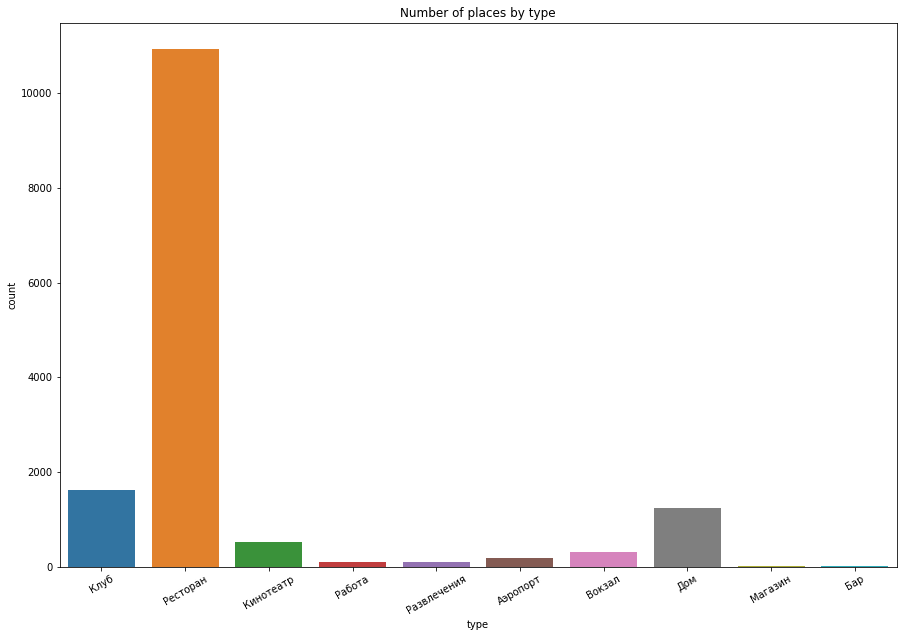

In [128]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x="type", data=places_data_text)
plt.title('Number of places by type')
plt.xticks(rotation=30)
plt.show()

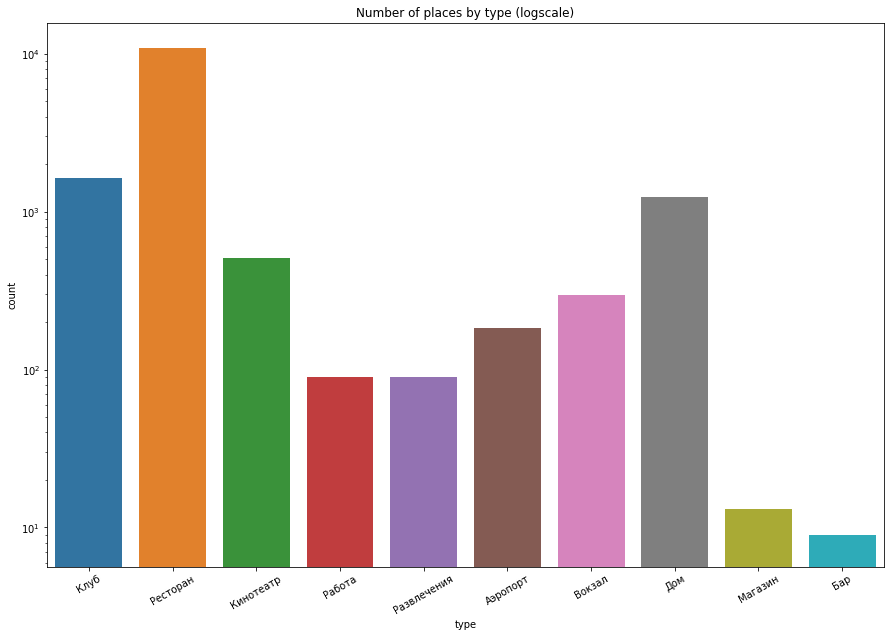

In [129]:
plt.figure(figsize=(15,10))
plt.yscale('log')
ax = sns.countplot(x="type", data=places_data_text)
plt.title('Number of places by type (logscale)')
plt.xticks(rotation=30)
plt.show()

Невооруженным глазом видно, что в этой выборке больше всего ресторанов.

### 3) Посчитайте распределение числа чекинов по всей выборке. Визуализируйте его.

In [130]:
checkins_count = places_data['checkins'].value_counts()
checkins_count

0       3990
1       1397
2       1123
3        903
4        746
5        537
6        478
7        451
8        337
9        287
10       281
12       206
11       205
13       167
14       152
15       146
16       134
17       127
19       116
20       112
18       103
23        95
25        83
21        79
22        77
28        71
24        67
31        66
26        63
33        62
        ... 
202        1
170        1
1754       1
267        1
740        1
275        1
716        1
652        1
580        1
500        1
444        1
420        1
404        1
396        1
364        1
284        1
276        1
172        1
855        1
755        1
603        1
547        1
499        1
483        1
443        1
355        1
347        1
339        1
283        1
971        1
Name: checkins, Length: 373, dtype: int64

In [131]:
checkins_dropna = places_data.checkins.dropna()
non_null_checkins = checkins_count.drop([0])
five_checkins = non_null_checkins.drop([1, 2, 3, 4])
bins0 = np.linspace(checkins_dropna.min() , checkins_dropna.max(), 300)
bins1 = np.linspace(non_null_checkins.min() , non_null_checkins.max(), 300)
bins5 = np.linspace(five_checkins.min(), five_checkins.max(), 300)

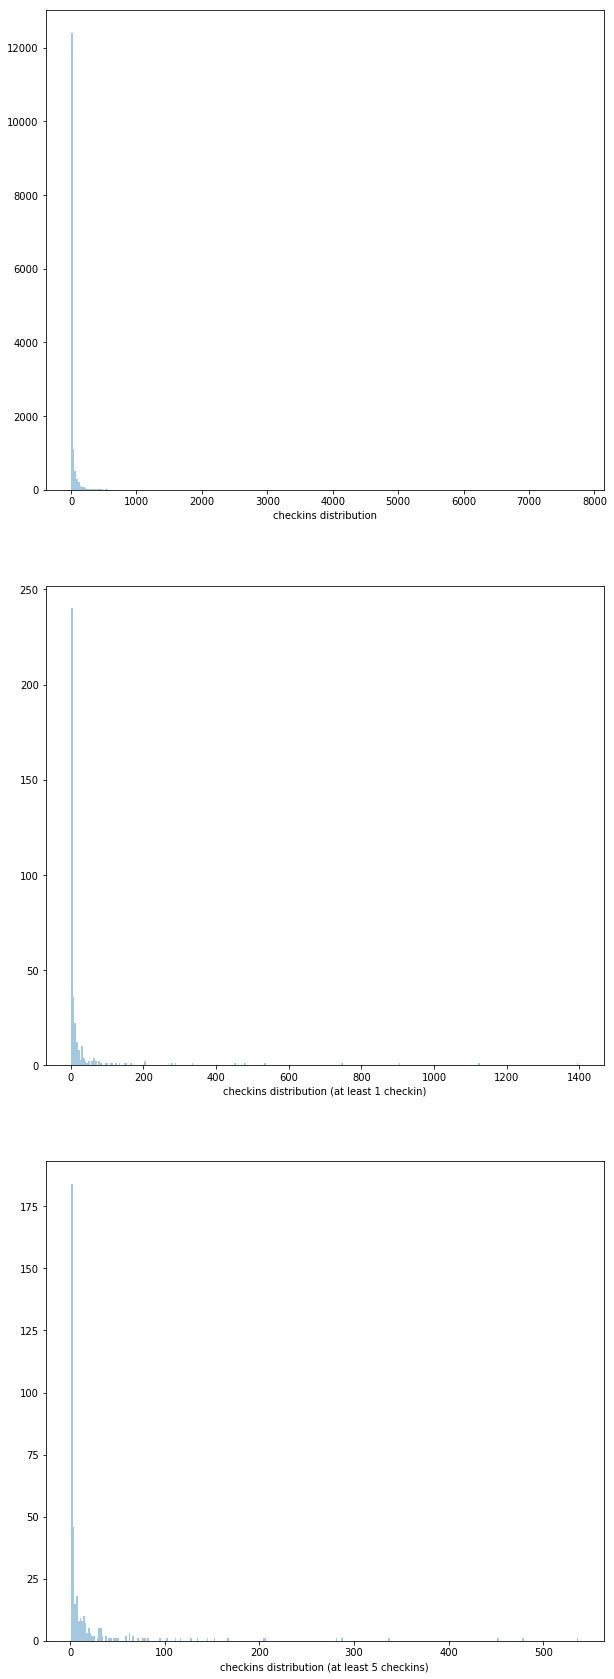

In [132]:
fig, axes = plt.subplots(nrows=3, ncols=1, sharex = True, sharey = True, figsize = (10,30))

sns.distplot(checkins_dropna, kde=False, bins=bins0, ax=plt.subplot(3,1, 1), axlabel = "checkins distribution")
sns.distplot(non_null_checkins, kde=False, bins=bins1, ax=plt.subplot(3,1, 2), axlabel = "checkins distribution (at least 1 checkin)")
sns.distplot(five_checkins, kde=False, bins=bins5, ax = plt.subplot(3,1,3), axlabel = "checkins distribution (at least 5 checkins)")
plt.show()

### 4) Постройте box plot по числу чекинов для каждого типа объектов.

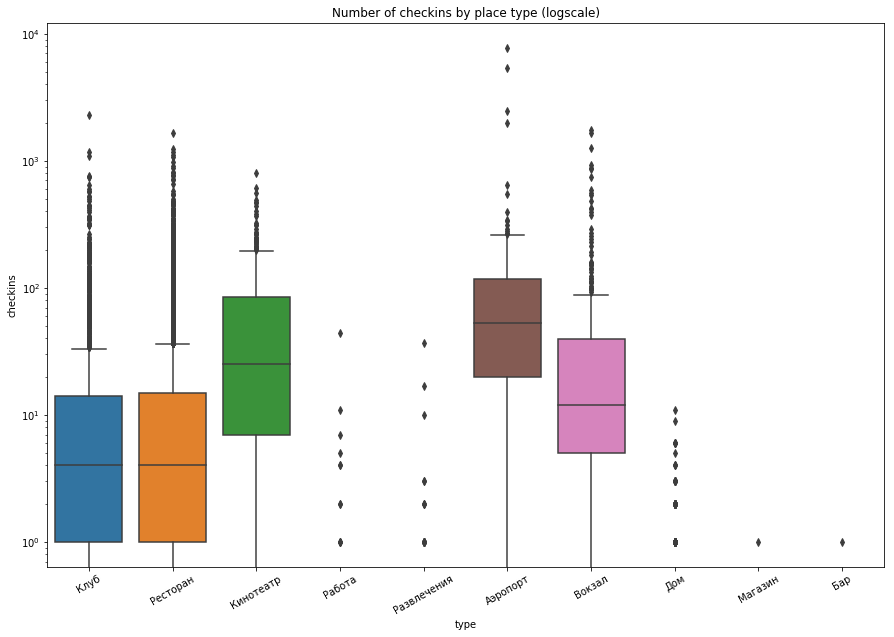

In [133]:
plt.figure(figsize=(15,10))
plt.yscale('log')
sns.boxplot(x=places_data_text.type, y=places_data_text.checkins)
plt.title('Number of checkins by place type (logscale)')
plt.xticks(rotation=30)

plt.show()

### 5) Преобразуйте поле created в datetime. Как давно были созданы объекты? Сколько объектов существует больше года?

In [134]:
places_data['created'] = pd.to_datetime(places_data['created'],unit='s')
places_data

,Unnamed: 0,address,checkins,city,country,created,icon,latitude,longitude,pid,title,type,updated
0,0,Мячковский б-р 3а,441,1.0,1,2010-08-02 09:39:01,https://vk.com/images/places/clubs.png,55.657941,37.751574,1,Baila Baila,4,1.507325e+09
1,1,Дачная 2а,16,123.0,1,2010-08-02 09:39:01,https://vk.com/images/places/clubs.png,53.202017,50.141377,2,Lust,4,1.507325e+09
2,2,Лени Голикова 29,7,2.0,1,2010-08-02 09:39:01,https://vk.com/images/places/clubs.png,59.843376,30.231480,3,Тайфун,4,1.486398e+09
3,3,Героев Танкограда 63,8,158.0,1,2010-08-02 09:39:01,https://vk.com/images/places/clubs.png,55.174954,61.451611,4,Hollywood,4,1.470157e+09
4,4,Мусы Джалиля 14К1,40,99.0,1,2010-08-02 09:39:01,https://vk.com/images/places/clubs.png,54.860834,83.091932,5,Барабас,4,1.502604e+09
5,5,Мусы Джалиля 14,6,99.0,1,2010-08-02 09:39:01,https://vk.com/images/places/clubs.png,54.861114,83.091415,6,Опера,4,1.471622e+09
6,6,Труда 153,15,158.0,1,2010-08-02 09:39:01,https://vk.com/images/places/clubs.png,55.166948,61.395017,7,Малахит,4,1.470755e+09
7,7,Сони Кривой 81,3,158.0,1,2010-08-02 09:39:01,https://vk.com/images/places/clubs.png,55.157006,61.365395,8,Полет,4,1.455943e+09
8,8,просп. Ленина 66а,198,158.0,1,2010-08-02 09:39:01,https://vk.com/images/places/clubs.png,55.160365,61.380302,9,Уральские пельмени,4,1.507461e+09
9,9,Гурьянова 31,14,1.0,1,2010-08-02 09:39:01,https://vk.com/images/places/clubs.png,55.684858,37.718300,10,Salvador Dali,4,1.498625e+09


In [135]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

one_year_ago = datetime.now() - relativedelta(years=1)

In [136]:
date1 = places_data['created'].min()
date2 = places_data['created'].max()
print('Объекты созданы с ' + str(date1) + ' по ' + str(date2))

Объекты созданы с 2010-08-02 09:39:01 по 2010-08-03 20:33:14


In [137]:
old_objects_number = len(places_data[places_data['created'] < one_year_ago])
print(str(old_objects_number) + ' объектов из ' + str(len(places_data)) + ' существуют больше года')

15000 объектов из 15000 существуют больше года
